In [1]:
#IMPORTING LIBRARIES

try:
    import numpy as np
    import tensorflow as tf
    import os
    import matplotlib.pyplot as plt
    print("----Libraries Loaded----")
except:
    print("----Libraries Not Loaded----")

----Libraries Loaded----


In [2]:
#CHANGING DIRECTORY

os.chdir(r'C:\Users\HP\OneDrive\Desktop\Projects\HandGestureInRealTime')
print("----Folder Loaded----")
os.listdir()

----Folder Loaded----


['.ipynb_checkpoints',
 'DataGeneration.ipynb',
 'Dataset',
 'HandGestureRecognitionModel .ipynb',
 'HandGestureRecognitionModel.h5',
 'HandSignRecognitionMain.ipynb',
 'training_hist.json']

In [3]:
#Data Preprocessing And Dataset Loading

from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_path= 'C:/Users/HP/OneDrive/Desktop/Projects/HandGestureInRealTime/Dataset/train'
validation_path= 'C:/Users/HP/OneDrive/Desktop/Projects/HandGestureInRealTime/Dataset/validation'
train_datagen =ImageDataGenerator(
        rescale=1.0 / 255.0, 
        rotation_range=0,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=False,  
        vertical_flip=False
) 
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0, 
        rotation_range=0,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=False,  
        vertical_flip=False)
training_set = train_datagen.flow_from_directory(training_path,
    class_mode='categorical',
    batch_size=32,
    target_size=(64,64)                                                 
)
validation_set = val_datagen.flow_from_directory(validation_path,
    class_mode='categorical',
    batch_size=32,
    target_size=(64,64)
)                                            
print("Dataset Loaded")

Found 20274 images belonging to 10 classes.
Found 4344 images belonging to 10 classes.
Dataset Loaded


In [4]:
#Building Model
cnn=tf.keras.models.Sequential()

#Adding Layers
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# adding second layer of the model
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# adding third layer of the model
cnn.add(tf.keras.layers.Dropout(0.5))

# Flattening the model
cnn.add(tf.keras.layers.Flatten())

# adding the Dense layers
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

# adding the output layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling Model
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Printing Summary Of Model
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [6]:
#Training Model
with tf.device('/GPU:0'):
    training_history = cnn.fit(
        training_set,
        verbose=1,
        epochs=10,
        validation_data = validation_set
    )

Epoch 1/10
634/634 [==============================] - 500s 782ms/step - loss: 1.8150 - accuracy: 0.3436 - val_loss: 1.1034 - val_accuracy: 0.6581
Epoch 2/10
634/634 [==============================] - 283s 446ms/step - loss: 0.7780 - accuracy: 0.7513 - val_loss: 0.3591 - val_accuracy: 0.9017
Epoch 3/10
634/634 [==============================] - 262s 413ms/step - loss: 0.3408 - accuracy: 0.8901 - val_loss: 0.2429 - val_accuracy: 0.9282
Epoch 4/10
634/634 [==============================] - 263s 415ms/step - loss: 0.2304 - accuracy: 0.9251 - val_loss: 0.1949 - val_accuracy: 0.9344
Epoch 5/10
634/634 [==============================] - 309s 487ms/step - loss: 0.1776 - accuracy: 0.9423 - val_loss: 0.1198 - val_accuracy: 0.9639
Epoch 6/10
634/634 [==============================] - 259s 408ms/step - loss: 0.1517 - accuracy: 0.9491 - val_loss: 0.1038 - val_accuracy: 0.9731
Epoch 7/10
634/634 [==============================] - 240s 379ms/step - loss: 0.1221 - accuracy: 0.9591 - val_loss: 0.0932 -

In [7]:
#Saving Model
cnn.save("HandGestureRecognitionModel.h5")
print('----Model Saved----')

----Model Saved----


In [8]:
#Saving History Of Model
import json
with open ('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [9]:
#Printing Model Accuracy
print('Validation set Accuracy: {}%'.format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 97.9742169380188%


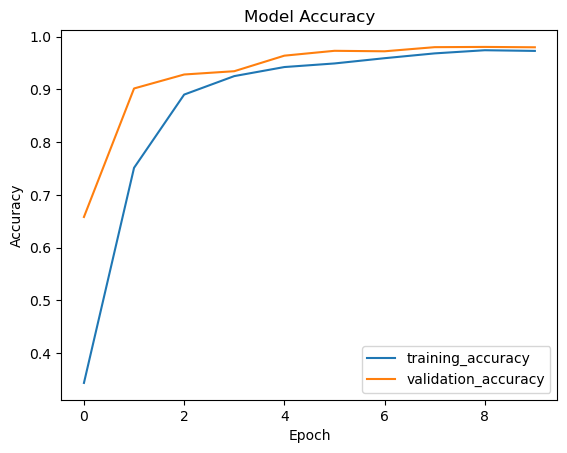

In [11]:
# Accuracy Visualization
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

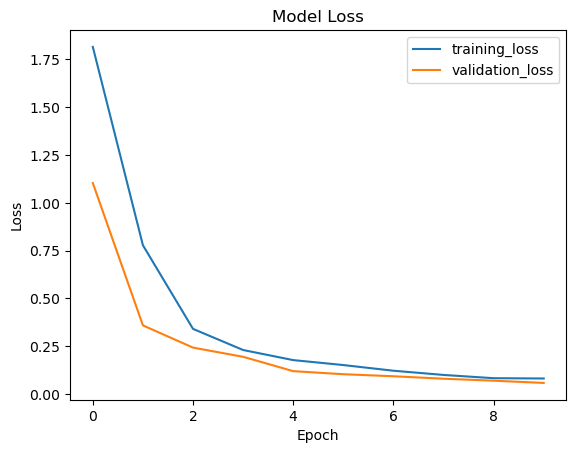

In [12]:
#Loss Visualization
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.show()

In [13]:
#Importing Libraries

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [33]:
# Model Loading

model = tf.keras.models.load_model('C:/Users/HP/OneDrive/Desktop/Projects/HandGestureInRealTime/HandGestureRecognitionModel.h5')
print('----Model Loaded----')

----Model Loaded----


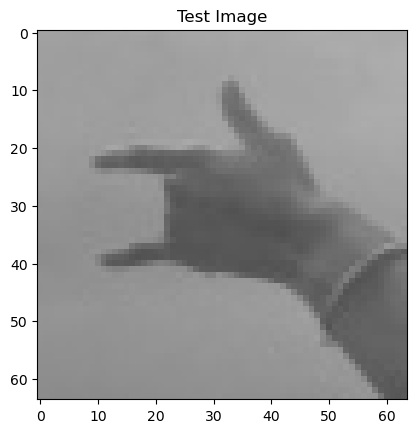

In [58]:
# Printing Test image for prediction

image_path='C:/Users/HP/OneDrive/Desktop/Projects/HandGestureInRealTime/Dataset/test/35.jpg'
image_path2='C:/Users/HP/OneDrive/Desktop/Projects/HandGestureInRealTime/Dataset/test/164.jpg'
img = cv2.imread(image_path)
img2= cv2.imread(image_path2)
plt.imshow(img)
plt.title("Test Image")
plt.show()

In [59]:
#preprocessing of testing Image
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr =tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])

#Predicting Image on Trained Model
predictions=model.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 226ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


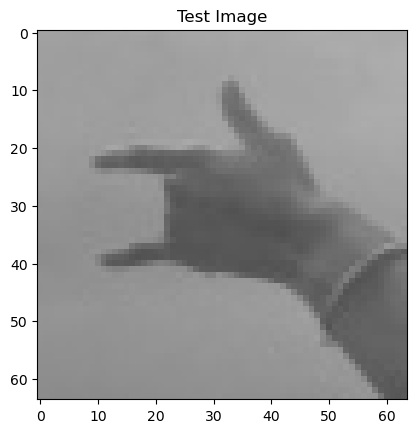

That's a Gesture of iloveyou


In [60]:
#DEfining Classes Of Gestures
gesture_classes= {0: 'goodluck', 1: 'hello', 2: 'iloveyou', 3: 'ok', 4: 'peace', 5: 'smile', 6: 'thumbsdown', 7: 'thumbsUp', 8: 'water', 9: 'yes'}

#Storing Index Of Gesture
result_index= np.where(predictions[0]==max(predictions[0]))

#Printing Test Image For Prediction
plt.imshow(img)
plt.title("Test Image")
plt.show()
print("That's a Gesture of {}".format(gesture_classes[result_index[0][0]]))

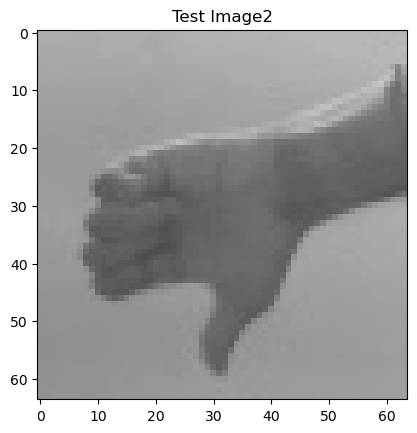

In [61]:
#Printing Test Image2
plt.imshow(img2)
plt.title("Test Image2")
plt.show()

In [62]:
#preprocessing of testing Image
image=tf.keras.preprocessing.image.load_img(image_path2,target_size=(64,64))
input_arr =tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])

#Predicting Image on Trained Model
predictions=model.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 78ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


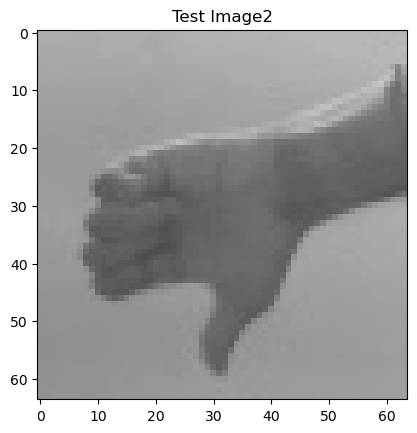

That's a Gesture of thumbsdown


In [63]:
#Storing Index Of Gesture
result_index= np.where(predictions[0]==max(predictions[0]))

#Printing Test Image For Prediction
plt.imshow(img2)
plt.title("Test Image2")
plt.show()
print("That's a Gesture of {}".format(gesture_classes[result_index[0][0]]))